In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def scatterplot(df, tx, ty):
    """Generates scatterplot with line of best fit"""
    title = ty+" vs. "+tx
    plot = df.plot(kind='scatter', figsize=(10, 5), title=title, x=tx, y=ty)
    plot.set_xlabel(tx)
    plot.set_ylabel(ty)
    
    # Uncomment the two lines below and make appropriate edits to label a particular team in a graph
    #team_lbl = df.loc[df['Team'] == 'frc4308']
    #plot.annotate('frc4308', (team_lbl[tx], team_lbl[ty]), textcoords='offset points', xytext=(0, 5), ha='center')
    # Make sure the team is in the dataframe/csv, of course
    
    x = df[tx]
    y = df[ty]
    bm = np.polynomial.polynomial.Polynomial.fit(x, y, 1)
    b, m = bm.convert().coef
    linestr = 'y = '+str(m)+'x + '+str(b)
    plot.plot(x, m*x+b)
    corr_mat = np.corrcoef(x, y)
    r2 = (corr_mat[0, 1])**2
    
    print(linestr)
    print("R^2 = " + str(r2))

# Getting Qualified

Success, as the data shows, begins in the qualification rounds. It can be easily uncovered through observation that matches alliances of random teams has a real effect. An alliance that has synergistic robots can triumph over an alliance with strong but unsynergistic robots. However, the best teams consistently overcome this randomness. While perfect records are rare, highly positive records are not. Teams also play qualification with a strategy in mind for alliance selection. Looking at data relating qualification rounds could show the effectiveness of these approaches.

In [4]:
df = pd.read_csv('2020ont_team_data.csv')

# Making a ranked dataframe. 
ranked_df = df.sort_values(by=['District Points'], ascending=False)
ranked_df = ranked_df.reset_index()
ranked_df['Rank'] = ranked_df['District Points'].rank(method='max', ascending=False) 
# While FRC uses tiebreakers, they are not implemented at this time
ranked_df

,index,Team,District Points,Alliance Points,Elimination Points,Qualification Points,Award Points,Qualification Win %,Top Qualification Rank,Top Alliance Seed,Top Alliance Pick,Playoff Level,Top Ranking Score,Top Cumulative Auto,Top Cumulative Endgame,Top Cumulative Teleop,Rank
0,1,frc865,78,16,30,22,10,0.833333,1,1.0,0.0,1.0,2.08,406.0,645.0,345.0,1.0
1,2,frc3683,76,15,30,21,10,0.916667,2,2.0,0.0,1.0,2.16,363.0,465.0,518.0,2.0
2,3,frc188,73,16,30,22,5,0.916667,1,1.0,0.0,1.0,2.16,514.0,585.0,510.0,3.0
3,4,frc2200,72,16,30,21,5,0.750000,2,1.0,1.0,1.0,1.91,398.0,650.0,597.0,5.0
4,5,frc1325,72,16,30,21,5,0.750000,2,1.0,1.0,1.0,2.00,380.0,675.0,329.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,frc5408,7,0,0,7,0,0.416667,26,0.0,0.0,0.0,0.91,303.0,365.0,198.0,83.0
83,84,frc3571,6,0,0,6,0,0.250000,27,0.0,0.0,0.0,0.50,298.0,245.0,145.0,85.0
84,76,frc7690,6,0,0,6,0,0.333333,26,0.0,0.0,0.0,0.66,233.0,260.0,148.0,85.0
85,85,frc6514,4,0,0,4,0,0.250000,36,0.0,0.0,0.0,0.58,263.0,350.0,179.0,87.0


y = 3.185098473056588x + -11.010805665255926
R^2 = 0.6300534813218719


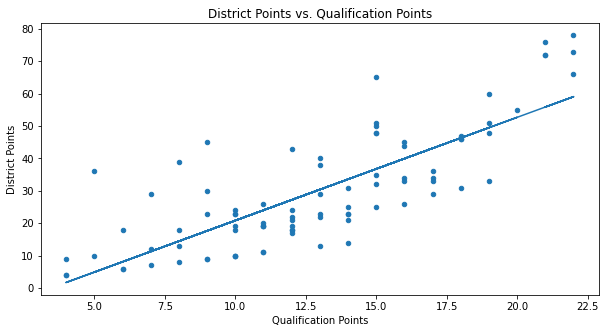

In [5]:
scatterplot(ranked_df, 'Qualification Points', 'District Points')

Recalling the Rank vs. Qualification Points graph from Part 1, a similar level of correlation is present in this tangentially related graph. The more district points you have, the more points you got in qualification. Below the trendline, high qualification points relative to district points, represents the teams that do not fare well in alliance selection and playoffs (perhaps not making an appearance in either), and seems appropriately represented. There are teams with lots of district points and relatively low qualification points, representing teams that were selected in spite of qualification rank and those who won awards. That classification is one that mid-level teams will often try to target.

y = 0.7844222357578323x + 18.963834469332383
R^2 = 0.6747812939248843
Mean: 54.100540822760834%
Median: 50.0%


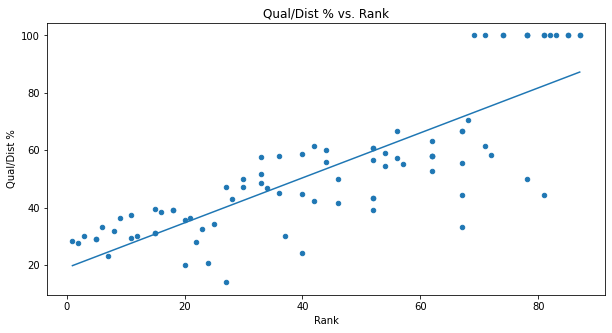

In [6]:
ranked_df['Qual/Dist %'] = 100 * ranked_df['Qualification Points'] / ranked_df['District Points']
scatterplot(ranked_df, 'Rank', 'Qual/Dist %')
print('Mean: ' + str(ranked_df['Qual/Dist %'].mean()) + '%')
print('Median: ' + str(ranked_df['Qual/Dist %'].median()) + '%')

The % of a team's total district points that qualification accounts for falls as their rank is higher and thus alliance selection, playoffs and awards account for much more. A couple of teams have low % within the midranks as well. There are also a couple teams where it accounts for 100% of a team's points. Both the median and mean are around 50%, top teams are typically around 20%. 

---

y = -1.9329276920899958x + 40.89670298570822
R^2 = 0.929568168186203


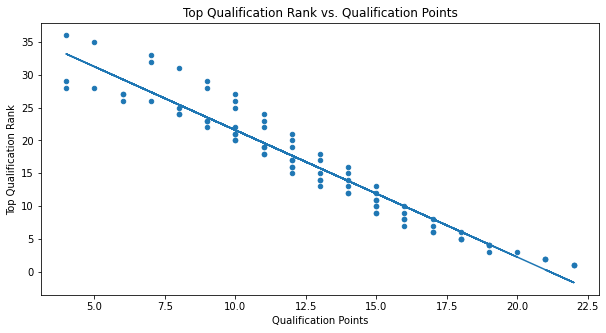

In [7]:
scatterplot(ranked_df, 'Qualification Points', 'Top Qualification Rank')

The Qualification Points formula accounts for the number of teams participating at the event (see 2020 Rulebook, pg 114). This may (I think probably) change due to the direction FRC is taking for 2021 competitions!

y = 0.034372306623615546x + 0.05254897925054963
R^2 = 0.869689200694108


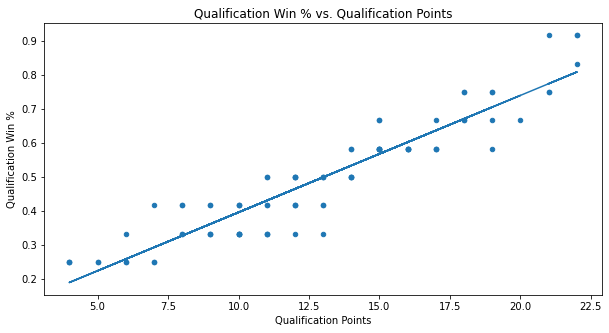

In [8]:
scatterplot(ranked_df, 'Qualification Points', 'Qualification Win %')

y = -0.016563556175747642x + 0.7602217008910281
R^2 = 0.8117155487728982


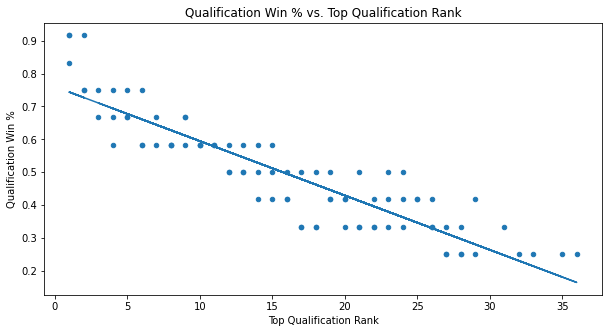

In [9]:
scatterplot(ranked_df, 'Top Qualification Rank', 'Qualification Win %')

Since the main way RP is earned is through accumulating wins, there is a naturally strong correlation. In fact, here is the graph with Ranking Score:

y = 0.08416995767781113x + 0.07733318754261109
R^2 = 0.9338891443444006


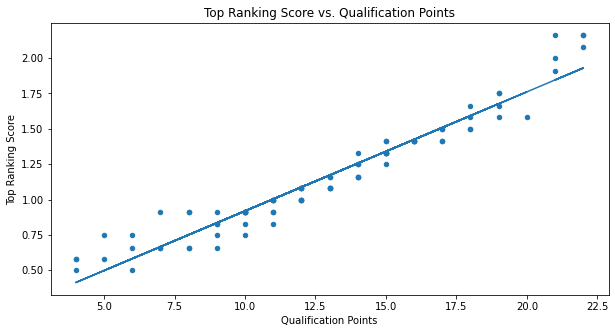

In [10]:
scatterplot(ranked_df, 'Qualification Points', 'Top Ranking Score')

---

y = 0.04558269546454025x + -2.642826294045056
R^2 = 0.41006922754089475


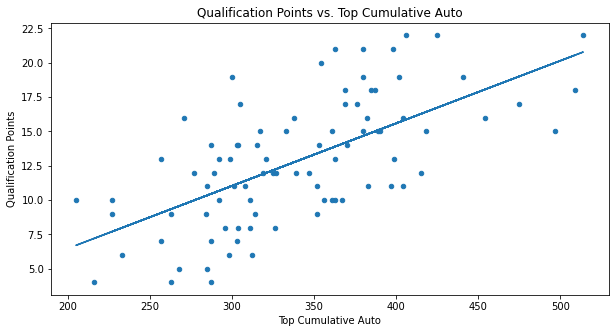

In [12]:
scatterplot(ranked_df, 'Top Cumulative Auto', 'Qualification Points')

A very general trend but weak correlation. Having auto is great but it's not the only thing that can push you to the front of the pack.

y = 0.03273059324802383x + 4.239418978689452
R^2 = 0.4105422769467739


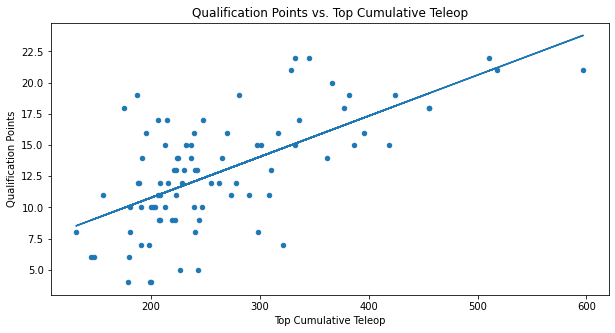

In [13]:
scatterplot(ranked_df, 'Top Cumulative Teleop', 'Qualification Points')

A similar story to the previous. It is notably dense from 200-300 teleop points and sparse elsewhere, with 2 at around x=500 and 1 at around x=600. Outperformace by a lot appears very possible in teleop.

y = 0.02987924753262237x + 0.624123998145329
R^2 = 0.43345318611948086


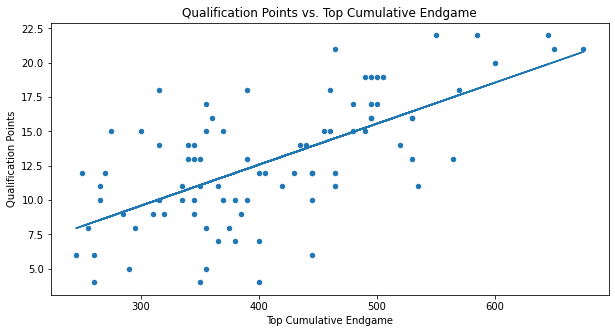

In [15]:
scatterplot(ranked_df, 'Top Cumulative Endgame', 'Qualification Points')

The strongest correlation of the three by just a little bit, still weakly correlated. Does have the smallest overall range. Largest clusters are around the 350s and 500s, with most of the rest lying in between (perhaps this is worth checking how points can and are often earned during auto to see if thats being reflected here).

y = 0.018389073089030542x + -5.762549151954357
R^2 = 0.6628537345243918


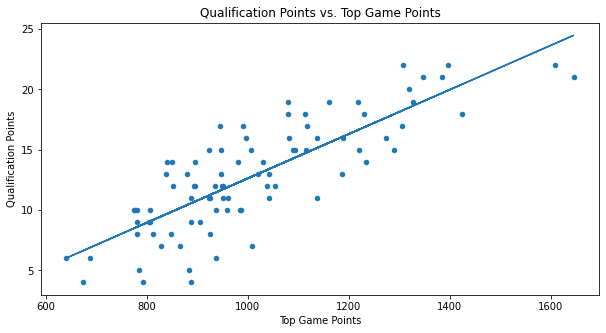

In [16]:
ranked_df['Top Game Points'] = ranked_df['Top Cumulative Auto'] + ranked_df['Top Cumulative Endgame'] + ranked_df['Top Cumulative Teleop']
scatterplot(ranked_df, 'Top Game Points', 'Qualification Points')

Once again, when put together, the correlation greatly improves. Clusters seem to be slightly smoothed out as well. It really does seem that particular teams have particular strengths and weaknesses in the three phases especially at their specific level of play. Infinite Recharge does seem very well designed and balanced in this aspect. Definitely something to keep in mind when approaching the 2021 replay!

---

Some conclusions:
1. Qualification contributes about 50% on average to your total District Points and thus rank, with that percentage steadily decreasing the higher rank becomes. 
2. The randomness of qualification can definitely be overcome. You can target high ranks and successfully do it, and target midranks in preparation for alliance selection as well. 
3. Different teams have unique strengths and weaknesses in this game.